### Import libraries

In [102]:
import numpy as np
import cv2
import os

**Parameter**

In [103]:
folder_path = "trafficSignData"
label_file = 'labels.csv'
imageDimesions = (32, 32)
imageDimesiontest = (32, 32, 3)
ratio = 0.2

### Load the images and number of classes

In [104]:
images = []
classNumber = []

In [105]:
# get the path of the traffic data
myList = os.listdir(folder_path)
print("View each classes in traffic folder :", myList, "\n")

# get the number of classes (number of folder)
lengthOfClasses = len(myList)
print("Total length of classes :", lengthOfClasses, "\n")


View each classes in traffic folder : ['50', '57', '32', '35', '56', '51', '34', '33', '20', '18', '27', '9', '0', '11', '7', '29', '16', '42', '45', '6', '28', '17', '1', '10', '19', '26', '8', '21', '44', '43', '38', '36', '31', '54', '53', '30', '37', '39', '52', '55', '46', '41', '48', '24', '23', '4', '15', '3', '12', '49', '40', '47', '2', '13', '5', '14', '22', '25'] 

Total length of classes : 58 



### Iterate to load the images and classes

In [106]:
print("Iterating to load images & classes\n")
# iterate 0 to length of classes (58)
for x in range(0, lengthOfClasses): # x is folder
    imagesList = os.listdir(os.path.join(folder_path, str(x))) # each (x) folder in trafficSignData 
    for img in imagesList:
        currentImage = cv2.imread(folder_path + "/" + str(x) + "/" + img) # trafficSignData --> x folder --> img = images
        if currentImage is not None:  # Check image is read
            currentImage = cv2.resize(currentImage, imageDimesions) # Resize to the dimensions to 32 X 32 pixels
            images.append(currentImage)
            classNumber.append(x)
        else:
            print(f"It is wrong folder path {folder_path}")
    print(x, end=" ")

Iterating to load images & classes

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 

### Convert list to numpy array

In [107]:
# Convert list to numpy array
images = np.array(images)
classNumber = np.array(classNumber)

**Result**

In [108]:
print(images)
print(classNumber)

[[[[ 41  39  32]
   [ 38  39  31]
   [ 38  38  30]
   ...
   [155 153 151]
   [190 190 190]
   [192 192 192]]

  [[ 40  40  30]
   [ 38  38  32]
   [ 40  38  31]
   ...
   [151 150 147]
   [189 190 190]
   [189 189 189]]

  [[ 41  41  31]
   [ 39  39  30]
   [ 38  39  30]
   ...
   [145 146 141]
   [188 188 188]
   [185 185 185]]

  ...

  [[194 189 181]
   [195 190 176]
   [196 189 178]
   ...
   [121  49   7]
   [123  51   5]
   [121  50   8]]

  [[194 185 171]
   [193 184 173]
   [194 185 172]
   ...
   [165 158 151]
   [167 160 150]
   [167 162 153]]

  [[179 174 166]
   [179 174 166]
   [183 176 168]
   ...
   [125  55  13]
   [126  56  12]
   [127  55  13]]]


 [[[126  64  21]
   [138  91  58]
   [143 102  71]
   ...
   [165 155 142]
   [176 180 185]
   [162 166 170]]

  [[139 110  93]
   [154 140 129]
   [120  78  58]
   ...
   [164 159 153]
   [174 178 183]
   [169 171 171]]

  [[135  97  75]
   [145 114 101]
   [140 126 119]
   ...
   [157 162 164]
   [185 188 192]
   [179 179

**Check images shape and classNumber**

- the first number is number of images
- 32 x 32 images
- 3 mean RGB 3 channals

In [109]:
print(images.shape)
print(classNumber.shape)

(4170, 32, 32, 3)
(4170,)


### Data Spliting

**import train_test_split**

In [110]:
from sklearn.model_selection import train_test_split

### Spliting the data
- split the array images, classNumber, set the test size for exmaple 0.2
- test_size = 0.2 means that training will be 0.8 percent and test will be 0.2, so 20% testing and 80% training

In [111]:
X_train, X_test, y_train, y_test = train_test_split(images, classNumber, test_size=ratio)

**Check whether it is split or not (train, test)**
- by using shape function

In [112]:
print("After spliting for images for traning")
print(X_train.shape)
print("After spliting for images for testing")
print(X_test.shape)

print("\n After spliting for classNUmber for traning & testing")
print(y_train.shape)
print(y_test.shape)

After spliting for images for traning
(3336, 32, 32, 3)
After spliting for images for testing
(834, 32, 32, 3)

 After spliting for classNUmber for traning & testing
(3336,)
(834,)


**Get the X_validation**
- to get X_validation use the 80% of images array which is X_train and use y_train

In [113]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=ratio)
print('Get the X_validation')
print(X_validation.shape)

Get the X_validation
(668, 32, 32, 3)


**Print X_train, X_test, and X_validation**

In [114]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validation.shape, y_validation.shape)

(2668, 32, 32, 3) (2668,)
(834, 32, 32, 3) (834,)
(668, 32, 32, 3) (668,)


### Check the images and classes are match & dimension are correct

In [115]:
try:
    # check it is same or not
    assert X_train.shape[0] == y_train.shape[0], "Number of images and class should be match for training"
    assert X_test.shape[0] == y_test.shape[0], "Number of images and class should be match for testing"
    # check dimensions is same or not
    assert X_train.shape[1:] == imageDimesiontest, "Dimensions should be same one for training"
    assert X_test.shape[1:] == imageDimesiontest, "Dimensions should be same one for testing"
    print("All tests passed")
except AssertionError as e:
    print(e)


All tests passed


**What inside the X and Y**
- X_train contain = actual images, Y_train contain = the ids of each image

In [116]:
# show the all the index numbers which are class number 0
print("Index which related to class 0")
print(np.where(y_train==0))
# total length of classNumber 0
print("Length of the class 0")
print(len(np.where(y_train==0)[0]))

# Declare array to store length of each class
numberOfSamples = []

print("Total number of images for each Class")
for x in range(0,lengthOfClasses):
    print(f"Class {x}: {len(np.where(y_train == x)[0])}")
    # save each class in array
    numberOfSamples.append(len(np.where(y_train == x)[0]))

print(f"Array of classes's length : {numberOfSamples}")

Index which related to class 0
(array([  10,   14,   51,  123,  209,  218,  265,  322,  342,  379,  432,
        486,  533,  553,  572,  583,  636,  646,  688,  696,  800,  805,
        815,  874,  875,  890,  926,  941,  975,  992, 1000, 1162, 1184,
       1188, 1209, 1227, 1246, 1277, 1327, 1333, 1392, 1440, 1446, 1480,
       1522, 1524, 1585, 1589, 1608, 1626, 1633, 1650, 1680, 1684, 1689,
       1753, 1808, 1829, 1925, 2029, 2052, 2161, 2172, 2174, 2203, 2233,
       2244, 2262, 2309, 2323, 2337, 2356, 2395, 2424, 2436, 2442, 2461,
       2490, 2556, 2568, 2608]),)
Length of the class 0
81
Total number of images for each Class
Class 0: 81
Class 1: 25
Class 2: 56
Class 3: 166
Class 4: 66
Class 5: 120
Class 6: 46
Class 7: 99
Class 8: 4
Class 9: 2
Class 10: 47
Class 11: 92
Class 12: 61
Class 13: 22
Class 14: 86
Class 15: 15
Class 16: 92
Class 17: 88
Class 18: 6
Class 19: 3
Class 20: 10
Class 21: 6
Class 22: 11
Class 23: 10
Class 24: 68
Class 25: 1
Class 26: 86
Class 27: 17
Class 28: 

### Virtualize the classes by number of length
- to make the chart, we need to import the matplotlib

**Import library**

In [117]:
import matplotlib.pyplot as plt

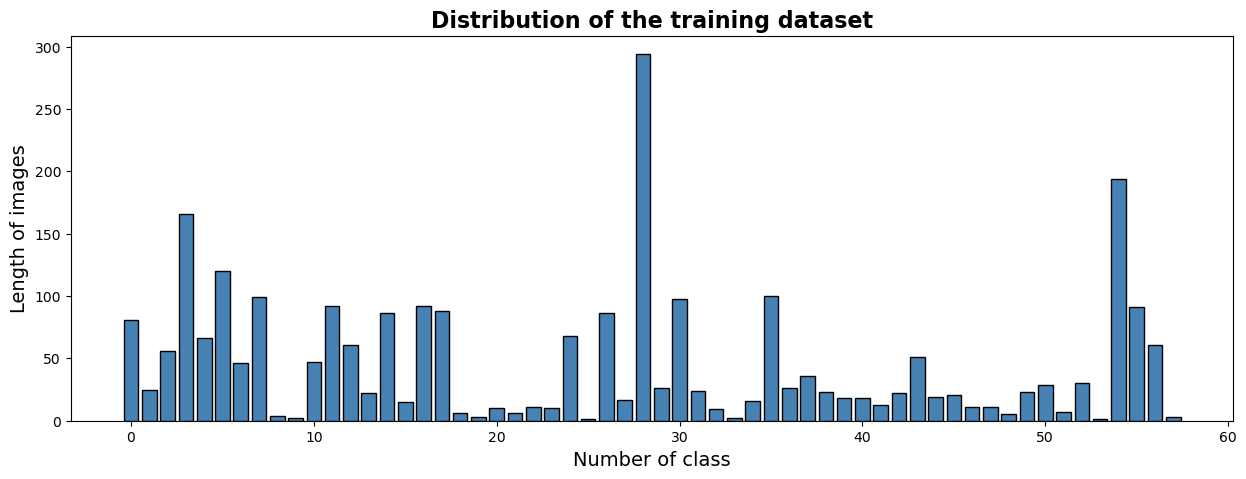

In [118]:
# 15 mean to length of figure & 5 mean to height of figure
plt.figure(figsize=(15, 5))

# start 0 to lengthofClasses, 
plt.bar(range(0, lengthOfClasses), numberOfSamples, color="steelblue", edgecolor='black')
plt.title("Distribution of the training dataset", fontsize=16, fontweight='bold')
plt.xlabel("Number of class", fontsize=14)
plt.ylabel("Length of images", fontsize=14)
plt.show()

### Virtualize with line chart

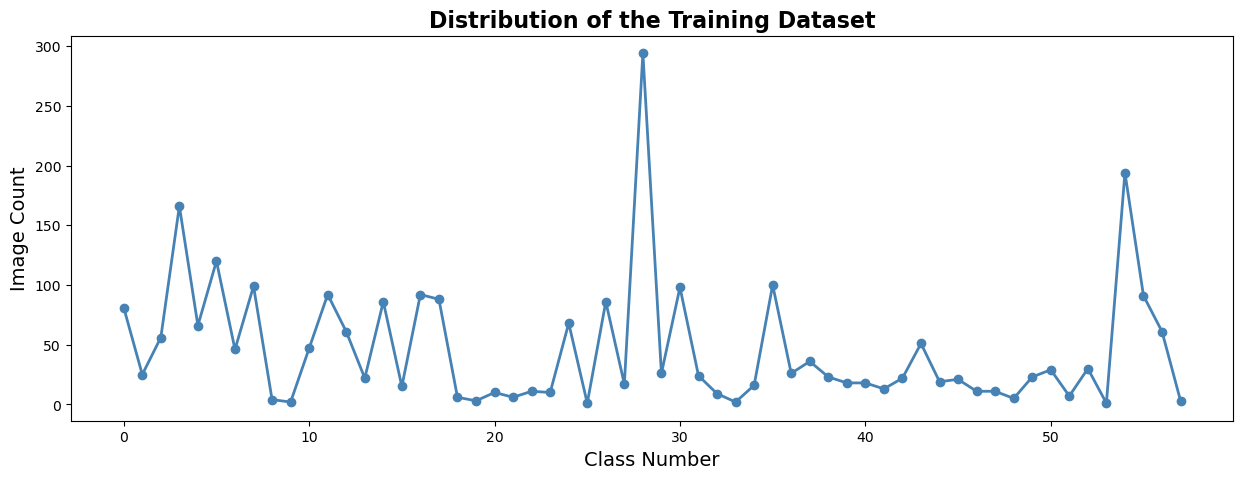

In [119]:
plt.figure(figsize=(15, 5))
plt.plot(range(0, lengthOfClasses), numberOfSamples, marker='o', color="steelblue", linewidth=2)
plt.title("Distribution of the Training Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Class Number", fontsize=14)
plt.ylabel("Image Count", fontsize=14)
plt.show()


### Read the CSV file
- to read the csv files, the pandas library need to import

In [120]:
import pandas as pd

In [121]:
data = pd.read_csv(label_file)
print("data shape ", data.shape, type(data))

data shape  (58, 2) <class 'pandas.core.frame.DataFrame'>
